<a href="https://colab.research.google.com/github/bchabros/machine_learning_bootcamp/blob/main/supervised/06_LOGIT/01_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

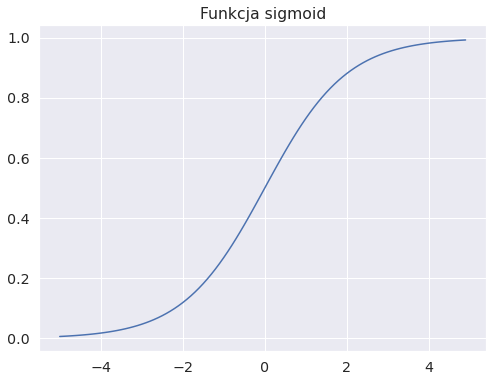

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)

plt.figure(figsize=(8, 6))
plt.plot(X, y )
plt.title('Funkcja sigmoid')
plt.show()

Dane

In [5]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

rozmiar data: (569, 30)
rozmiar target: (569,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.60, -1.10, -0.58, -0.59, 0.51, -0.26, -0.30, -0.55, -0.47, -0.33, ..., -0.53, -0.82, -0.53, -0.53, 0.79, -0.25, 0.15, -0.74, -0.21, -0.05],
       [0.20, 0.71, 0.40, 0.07, 0.24, 2.20, 2.30, 1.22, 0.86, 0.93, ..., 0.00, 0.29, 0.52, -0.09, 0.45, 2.83, 2.94, 2.01, -0.02, 1.73],
       [-0.69, 0.17, -0.66, -0.67, 0.94, 0.17, -0.26, -0.30, 0.69, 0.27, ..., -0.62, 0.07, -0.55, -0.60, 0.17, -0.42, -0.37, -0.53, 0.47, -0.22],
       [0.23, 0.61, 0.21, 0.10, -0.81, -0.05, -0.26, -0.27, 0.51, -0.52, ..., 0.09, 0.93, 0.07, -0.03, -1.11, 0.49, 0.18, 0.25, 0.46, 0.47],
       [0.10, -0.02, 0.08, -0.00, -0.90, -0.50, -0.02, -0.51, -1.20, -0.77, ..., -0.01, 0.42, 0.01, -0.10, -1.05, 0.05, 0.49, -0.28, -0.66, -0.50],
       [1.98, 0.82, 1.83, 2.09, -0.14, -0.05, 0.25, 0.95, -0.13, -1.46, ..., 2.65, 1.58, 2.36, 3.02, 0.37, 0.02, 0.19, 1.31, -0.09, -0.47],
       [-0.81, 1.74, -0.84, -0.74, -2.01, -1.25, -0.92, -1.17, 0.24, -0.94, ..., -0.88, 1.28, -0.82, -0.76, -1.82, -0.70, -0.77, -1.41, -0

In [12]:
scaler.mean_

array([14.18, 19.43, 92.34, 659.79, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.41, 1.22, 2.93, 41.33, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.33, 25.81, 107.74, 887.07, 0.13, 0.26, 0.27, 0.11, 0.29, 0.08])

In [13]:
scaler.scale_

array([3.54, 4.39, 24.47, 356.30, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.53, 2.13, 47.68, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.85, 6.19, 33.97, 572.64, 0.02, 0.16, 0.21, 0.07, 0.06, 0.02])

Dopasowanie modelu

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

Dokladne pr

In [16]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.01, 0.99],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.07, 0.93],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.17, 0.83],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.10, 0.90],
       [0.02, 0.98],
       [0.04, 0.96],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.88, 0.12],
       [0.00, 1.00],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.56, 0.44],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00]])

Ocena modelu

Accuracy: 1.0


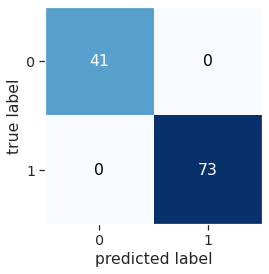

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [18]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        73

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

